<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
df=pd.read_csv(house_csv)

In [4]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [5]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [6]:
# ANSWER
df['price'].mean()

234144.26395939087

#### 2.2 List all possible variables which might be Predictor variable.

In [7]:
# ANSWER
# Beds, Baths, Sq_ft, price

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

            beds     baths    sq__ft     price
beds    1.000000  0.839650  0.684041  0.342024
baths   0.839650  1.000000  0.665690  0.416208
sq__ft  0.684041  0.665690  1.000000  0.333897
price   0.342024  0.416208  0.333897  1.000000


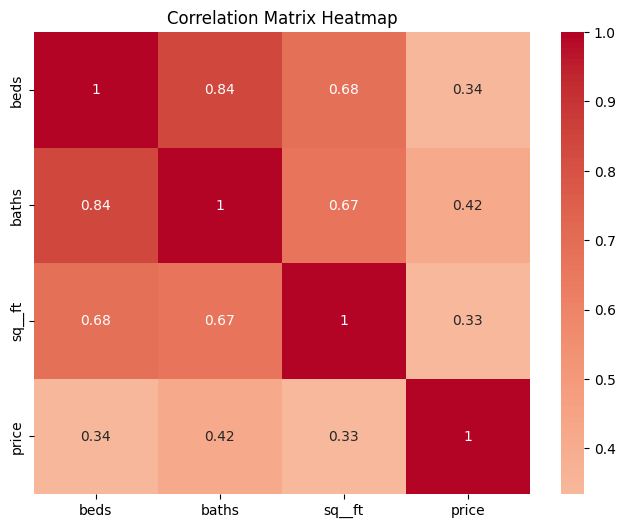

In [8]:
# ANSWER
selected_columns = ['beds', 'baths', 'sq__ft', 'price']
df_selected = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

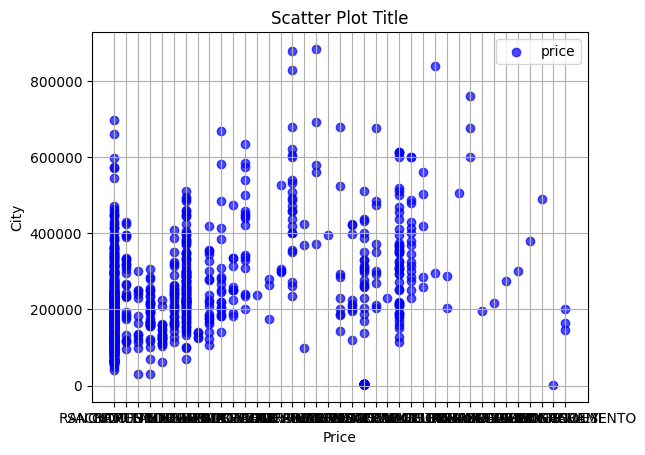

/var/folders/jk/x0srxcqj6mx0vmvp43lqpm2c6bm373/T/ipykernel_6142/1892126928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


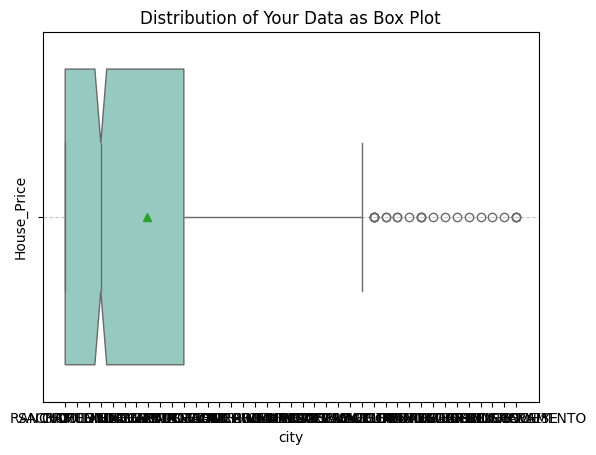

In [9]:
## check relation between Price and City

def my_box_plot (df, col, x_label, y_label):
   sns.boxplot(
    data=df[col],
    orient="h",  # Vertical orientation
    palette="Set3",  # Color scheme (adjust as desired)
    showmeans=True,  # Show mean as a diamond
    notch=True,  # Add notches for better spread indication
    )

   plt.xlabel(x_label)
   plt.ylabel(y_label)
   plt.title("Distribution of Your Data as Box Plot")
   plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add faint gridlines
   plt.show()

plt.scatter(df['city'],df['price'], c='blue', label='price', alpha=0.7)

# Add labels and title
plt.xlabel("Price")
plt.ylabel("City")
plt.title("Scatter Plot Title")
plt.legend()
# Show the plot
plt.grid(True) 
plt.show()

my_box_plot(df,'city','city','House_Price')

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [10]:
# ANSWER
mean_house_price = df['price'].mean()
print(mean_house_price)

234144.26395939087


#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [11]:
# ANSWER
price_differences = []
y=0
for i in df['price']:
    x = df['price'][y] - mean_house_price
    price_differences.append(x)
    y+=1

print(price_differences)


[-174922.26395939087, -165932.26395939087, -165264.26395939087, -164837.26395939087, -152244.26395939087, -144223.26395939087, -143249.26395939087, -143142.26395939087, -139239.26395939087, -135207.26395939087, -133835.26395939087, -127894.26395939087, -127292.26395939087, -126642.26395939087, -125394.26395939087, -123444.26395939087, -120881.26395939087, -117894.26395939087, -114144.26395939087, -112514.26395939087, -112144.26395939087, -111462.26395939087, -111144.26395939087, -110044.26395939087, -109144.26395939087, -107504.26395939087, -106863.26395939087, -105144.26395939087, -102944.26395939087, -102144.26395939087, -101144.26395939087, -99589.26395939087, -97644.26395939087, -95394.26395939087, -93144.26395939087, -87894.26395939087, -86836.26395939087, -85394.26395939087, -84551.26395939087, -84144.26395939087, -82144.26395939087, -80144.26395939087, -77248.26395939087, -72894.26395939087, -72644.26395939087, -70144.26395939087, -69144.26395939087, -67787.26395939087, -67787.2

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [12]:
# ANSWER
#X = np.array(df[["baths", "beds", "sq__ft"]])
X = np.array(df[["sq__ft"]])
Y = np.array(df['price'])
model = LinearRegression()

model.fit(X, Y)

LinearRegression()

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [13]:
# ANSWER
beta_1 = model.coef_
print(beta_1)

[54.15863969]


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [14]:
# ANSWER
beta_0 = model.intercept_
print(beta_0)

162930.16140699765


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [15]:
# ANSWER
Y_pred = model.predict(X)
print(Y_pred)

[208206.78418661 226133.29392351 206040.43859907 209073.32242163
 206094.59723876 223696.15513753 222721.29962314 226674.8803204
 213893.44135391 224995.96249005 212160.36488387 232740.64796551
 210102.33657571 218171.9738893  218280.29116868 224346.05881379
 208640.05330412 205986.27995938 194775.44154385 236369.27682465
 223479.52057878 234906.99355306 230086.87462078 249638.14354834
 211727.09576636 221854.76138812 215084.93142705 223533.67921846
 237669.08417717 230520.14373828 219200.98804338 225320.91432819
 237669.08417717 223371.2032994  219200.98804338 239727.11248533
 221529.80954999 242651.67902852 224995.96249005 204090.72757028
 233553.02756084 228299.63951105 220121.68491809 219417.62260214
 248879.9225927  223587.83785815 248500.81211488 268810.30199808
 252616.8687312  242922.47222696 227270.62535697 249042.39851176
 242164.25127132 255758.06983314 227108.14943791 239077.20880907
 268160.39832181 226404.08712196 225320.91432819 263177.80347047
 228732.90862856 224129.42

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [16]:
# ANSWER
residuals = Y - Y_pred
print(residuals)

[-1.48984784e+05 -1.57921294e+05 -1.37160439e+05 -1.39766322e+05
 -1.24194597e+05 -1.33775155e+05 -1.31826300e+05 -1.35672880e+05
 -1.18988441e+05 -1.26058962e+05 -1.11851365e+05 -1.26490648e+05
 -1.03250337e+05 -1.10669974e+05 -1.09530291e+05 -1.13646059e+05
 -9.53770533e+04 -8.97362800e+04 -7.47754415e+04 -1.14739277e+05
 -1.01479521e+05 -1.12224994e+05 -1.07086875e+05 -1.25538144e+05
 -8.67270958e+04 -9.52147614e+04 -8.78039314e+04 -9.45336792e+04
 -1.06469084e+05 -9.85201437e+04 -8.62009880e+04 -9.07659143e+04
 -1.01169084e+05 -8.46212033e+04 -7.82009880e+04 -9.34771125e+04
 -7.42218095e+04 -9.39016790e+04 -7.54029625e+04 -5.40907276e+04
 -8.15530276e+04 -7.42996395e+04 -6.32256849e+04 -5.81676226e+04
 -8.73799226e+04 -5.95878379e+04 -8.35008121e+04 -1.02453302e+05
 -8.62598687e+04 -7.49224722e+04 -5.72706254e+04 -7.60423985e+04
 -6.79142513e+04 -8.14450698e+04 -4.86281494e+04 -6.03172088e+04
 -8.85803983e+04 -4.54040871e+04 -4.34489143e+04 -8.05908035e+04
 -4.60169086e+04 -4.13794

##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [17]:
# ANSWER
r_squared = model.score(X, Y)
print(r_squared)

0.11148717682951459


### MY FUNCTIONTO TO CREATE THE VALUES OF BETA_0, BETA_1 AND Y PREDICTED VALUE

In [18]:
def prags_linear_regression(X, Y):
    # Add a column of ones to X to account for the intercept term (beta_0)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Calculate beta using the normal equation: beta = (X_b.T * X_b)^-1 * X_b.T * Y
    beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    
    # Separate beta_0 and beta_1
    beta_0 = beta[0]
    beta_1 = beta[1:]

    # Predict the values
    Y_pred = X_b.dot(beta)

    # Calculate the residuals
    residuals = Y - Y_pred

    return beta_0, beta_1, Y_pred, residuals

beta_0_pr, beta_1_pr, Y_pred_pr, residuals_pr = prags_linear_regression(X,Y)

print(beta_0_pr) 
print(beta_0)

print(beta_1_pr) 
print(beta_1)


162930.16140699777
162930.16140699765
[54.15863969]
[54.15863969]


##### 2.7.F [BONUS] Draw Plot of Predicted Line

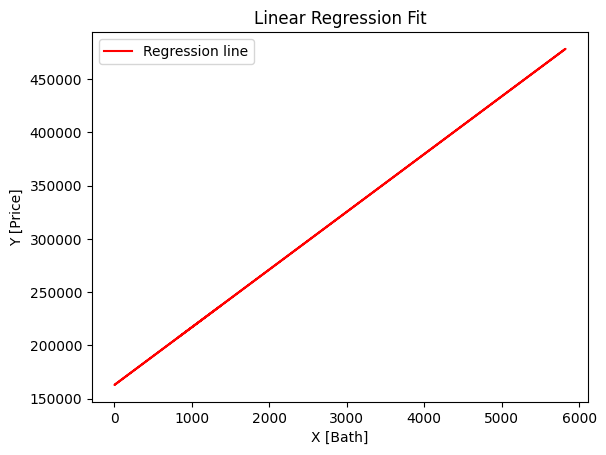

In [19]:
# ANSWER
# Plot the regression line
plt.plot(X, Y_pred, color='red', label='Regression line')

# Adding title and labels
plt.title('Linear Regression Fit')
plt.xlabel('X [Bath]')
plt.ylabel('Y [Price]')
plt.legend()


##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

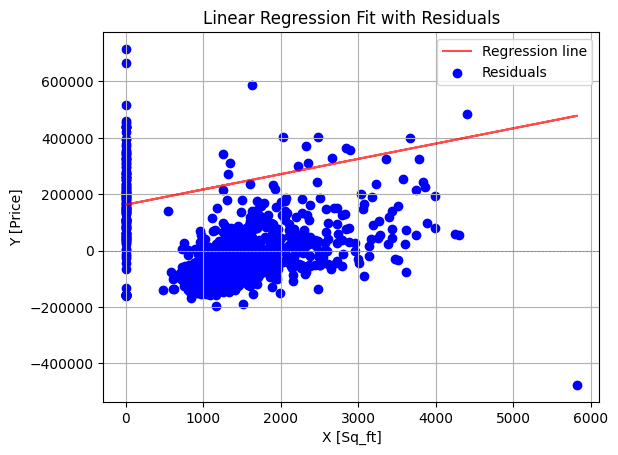

In [20]:
# ANSWER


# Add transparency to the main plot for better visibility of residuals
plt.plot(X, Y_pred, color='red', alpha=0.7, label='Regression line')  # Adjust alpha for desired transparency

# Add scatter plot for residuals (optional)
plt.scatter(X, residuals, color='blue', label='Residuals')  # Adjust marker size and style as needed

# Enhance plot appearance (consider these suggestions)
plt.grid(True)  # Add grid lines for better readability
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0 for reference

# Title, labels, and legend
plt.title('Linear Regression Fit with Residuals')
plt.xlabel('X [Sq_ft]')
plt.ylabel('Y [Price]')
plt.legend()

plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [26]:
# ANSWER
house_value = beta_0 +beta_1*1204 
print (beta_0, beta_1)
print(house_value)

162930.16140699765 [54.15863969]
[228137.16359199]




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



